In [22]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
boston = load_boston()
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


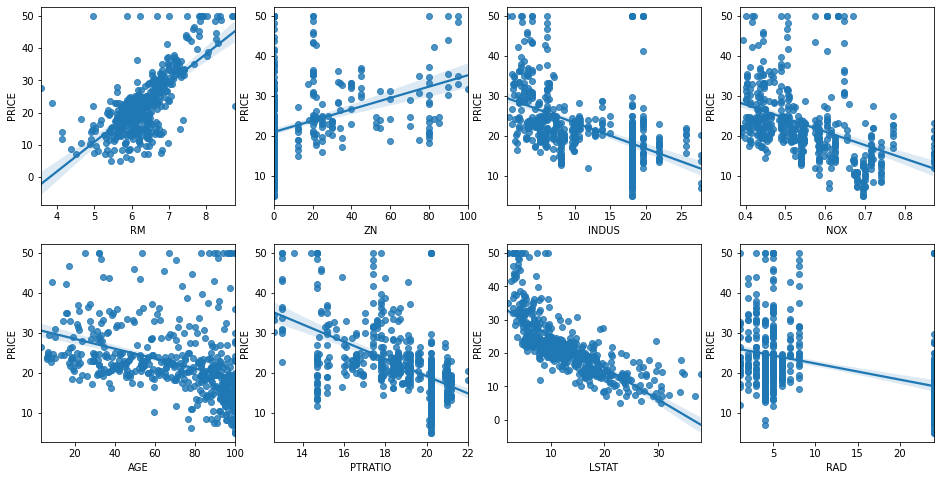

In [24]:
fig, asx = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row, col = int(i/4), i%4
    sns.regplot(x=feature,y='PRICE',data=df,ax=asx[row][col])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train,X_test,y_tarin,y_test = train_test_split(
    boston.data, boston.target,test_size=0.3,random_state=156
)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_tarin)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)
print(f'mse : ,{mse:.2f}, RMSE : {np.sqrt(mse):.2f}')
print(f'R_squared : {r2:.4f}')

mse : ,17.30, RMSE : 4.16
R_squared : 0.7572


In [28]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [29]:
lr.intercept_

40.99559517216445

### 회귀식
- price = -1.13*CRIM + 0.065*ZN + 0.013*INDUS + 3.05*CHAS + -0.198*NOX + 3.35*RM +0.0006*AGE - 1.74*DIS + 0.356*RAD - 0.014*TAX - 0.92*PTRATIO + 0.01*B - 0.566*LSTAT + 40.99

### 교차검증 - cross_val_score

In [32]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [33]:
# 5 폴드 세트로 MSE를 구함
neg_mean_socre = cross_val_score(lr, boston.data,boston.target,
                                 scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-neg_mean_socre)
ave_rmse = np.average(rmse_scores)

print(f'개별 MSE : {np.round(neg_mean_socre,2)}')
print(f'개별 RMSE : {np.round(rmse_scores,2)}')
print(f'평균 RMSE : {ave_rmse:.4f}')

개별 MSE : [-12.46 -26.05 -33.07 -80.76 -33.31]
개별 RMSE : [3.53 5.1  5.75 8.99 5.77]
평균 RMSE : 5.8287
